# What are Convolutions in Mathematical Terms?
Convolutions are a mathematical operation that combines two functions to produce a third function. In the context of neural networks, particularly convolutional neural networks (CNNs), convolutions are used to extract features from input data, such as images.

## The following examples explain continuous, discrete, and two-dimensional convolutions:
### Continuous Convolution
In continuous convolution, the convolution of two continuous functions $f(t)$ and $g(t)$ is defined as:
$$(f * g)(t) = \int_{-\infty}^{\infty} f(\tau) g(t - \tau) d\tau$$
This integral computes the area under the product of the two functions as one function slides over the other.
### Discrete Convolution
In discrete convolution, the convolution of two discrete sequences $x[n]$ and $h[n]$ is defined as:
$$(x * h)[n] = \sum_{k=-\infty}^{\infty} x[k] h[n - k]$$
This sum computes the weighted sum of the input sequence $x[n]$ with the kernel $h[n]$ as it slides over the input.
### Two-Dimensional Convolution
In two-dimensional convolution, which is commonly used in image processing, the convolution of a two-dimensional function $f(x, y)$ and a kernel $g(x, y)$ is defined as:
$$(f * g)(x, y) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(\tau_x, \tau_y) g(x - \tau_x, y - \tau_y) d\tau_x d\tau_y$$
In the discrete case, it can be expressed as:
$$(f * g)(x, y) = \sum_{m=-\infty}^{\infty} \sum_{n=-\infty}^{\infty} f(m, n) g(x - m, y - n)$$
This operation computes the weighted sum of the input image $f(x, y)$ with the kernel $g(x, y)$ as it slides over the image, effectively extracting features such as edges, textures, and patterns from the input data.

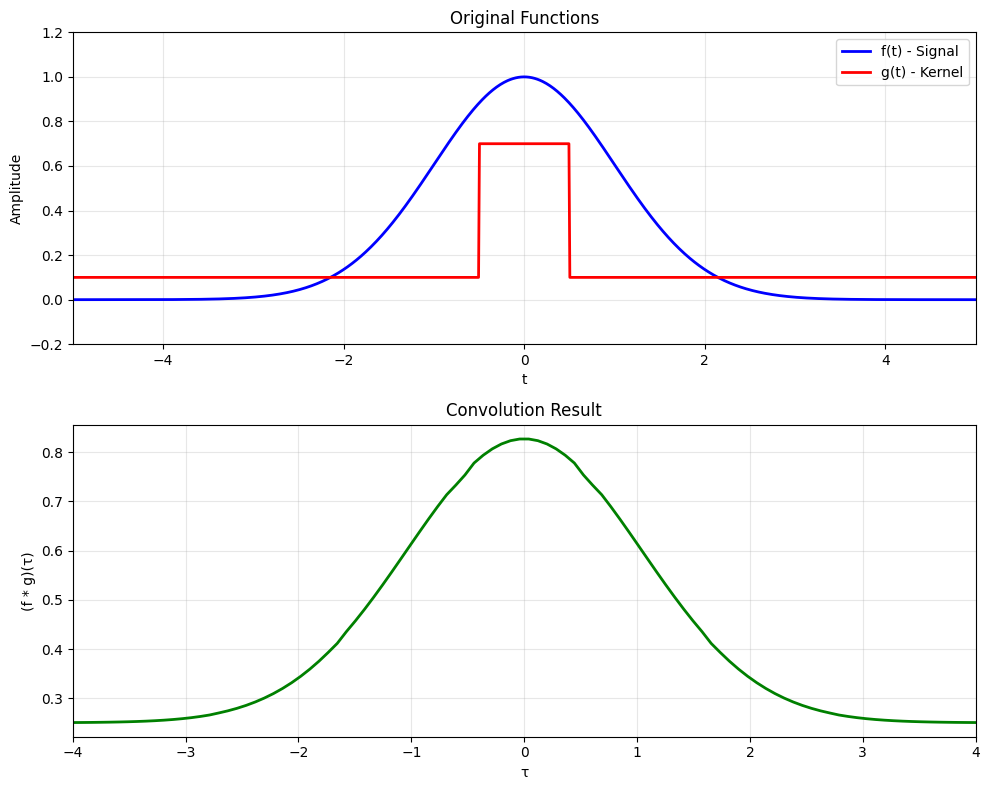

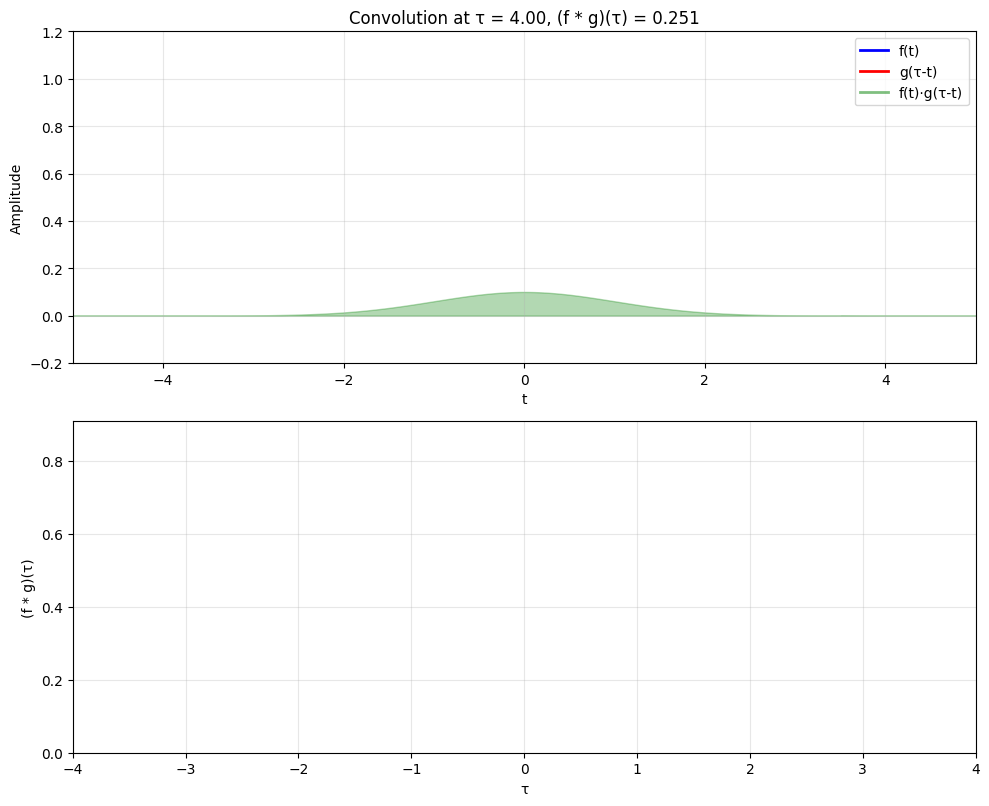

In [5]:
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

import matplotlib.pyplot as plt

# Define two continuous functions
def f(t):
    """Signal function - a Gaussian pulse"""
    return np.exp(-t**2 / 2)

def g(t):
    """Kernel function - a rectangular pulse"""
    return np.where(np.abs(t) <= 0.5, 1.0, 0.1)

# Create time array
t = np.linspace(-5, 5, 1000)

# Compute convolution for different tau values
tau_values = np.linspace(-4, 4, 100)
convolution_result = []

for tau in tau_values:
    # Compute f(t) * g(tau - t) for all t
    integrand = f(t) * g(tau - t)
    # Approximate integral using trapezoidal rule
    conv_value = np.trapezoid(integrand, t)
    convolution_result.append(conv_value)

# Create visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot the original functions
ax1.plot(t, f(t), 'b-', label='f(t) - Signal', linewidth=2)
ax1.plot(t, g(t), 'r-', label='g(t) - Kernel', linewidth=2)
ax1.set_xlim(-5, 5)
ax1.set_ylim(-0.2, 1.2)
ax1.set_xlabel('t')
ax1.set_ylabel('Amplitude')
ax1.set_title('Original Functions')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot the convolution result
ax2.plot(tau_values, convolution_result, 'g-', linewidth=2)
ax2.set_xlim(-4, 4)
ax2.set_xlabel('τ')
ax2.set_ylabel('(f * g)(τ)')
ax2.set_title('Convolution Result')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Create an interactive animation showing the convolution process
fig_anim, (ax_top, ax_bottom) = plt.subplots(2, 1, figsize=(10, 8))

# Initialize plots
line_f, = ax_top.plot([], [], 'b-', label='f(t)', linewidth=2)
line_g_shifted, = ax_top.plot([], [], 'r-', label='g(τ-t)', linewidth=2)
line_product, = ax_top.plot([], [], 'g-', alpha=0.5, label='f(t)·g(τ-t)', linewidth=2)
fill_area = None

line_conv, = ax_bottom.plot([], [], 'g-', linewidth=2)
point_conv, = ax_bottom.plot([], [], 'go', markersize=8)

ax_top.set_xlim(-5, 5)
ax_top.set_ylim(-0.2, 1.2)
ax_top.set_xlabel('t')
ax_top.set_ylabel('Amplitude')
ax_top.legend()
ax_top.grid(True, alpha=0.3)

ax_bottom.set_xlim(-4, 4)
ax_bottom.set_ylim(0, max(convolution_result) * 1.1)
ax_bottom.set_xlabel('τ')
ax_bottom.set_ylabel('(f * g)(τ)')
ax_bottom.grid(True, alpha=0.3)

def init():
    line_f.set_data([], [])
    line_g_shifted.set_data([], [])
    line_product.set_data([], [])
    line_conv.set_data([], [])
    point_conv.set_data([], [])
    return line_f, line_g_shifted, line_product, line_conv, point_conv

def animate(frame):
    global fill_area
    
    # Current tau value
    tau = tau_values[frame]
    
    # Update top plot
    line_f.set_data(t, f(t))
    line_g_shifted.set_data(t, g(tau - t))
    product = f(t) * g(tau - t)
    line_product.set_data(t, product)
    
    # Remove previous fill
    if fill_area is not None:
        fill_area.remove()
    
    # Add shaded area under product
    fill_area = ax_top.fill_between(t, 0, product, alpha=0.3, color='green')
    
    # Update title with current tau and convolution value
    ax_top.set_title(f'Convolution at τ = {tau:.2f}, (f * g)(τ) = {convolution_result[frame]:.3f}')
    
    # Update bottom plot
    line_conv.set_data(tau_values[:frame+1], convolution_result[:frame+1])
    point_conv.set_data([tau], [convolution_result[frame]])
    
    return line_f, line_g_shifted, line_product, line_conv, point_conv, fill_area

# Create animation
anim = FuncAnimation(fig_anim, animate, init_func=init, frames=len(tau_values), 
                    interval=50, blit=False, repeat=True)

plt.tight_layout()
HTML(anim.to_jshtml())

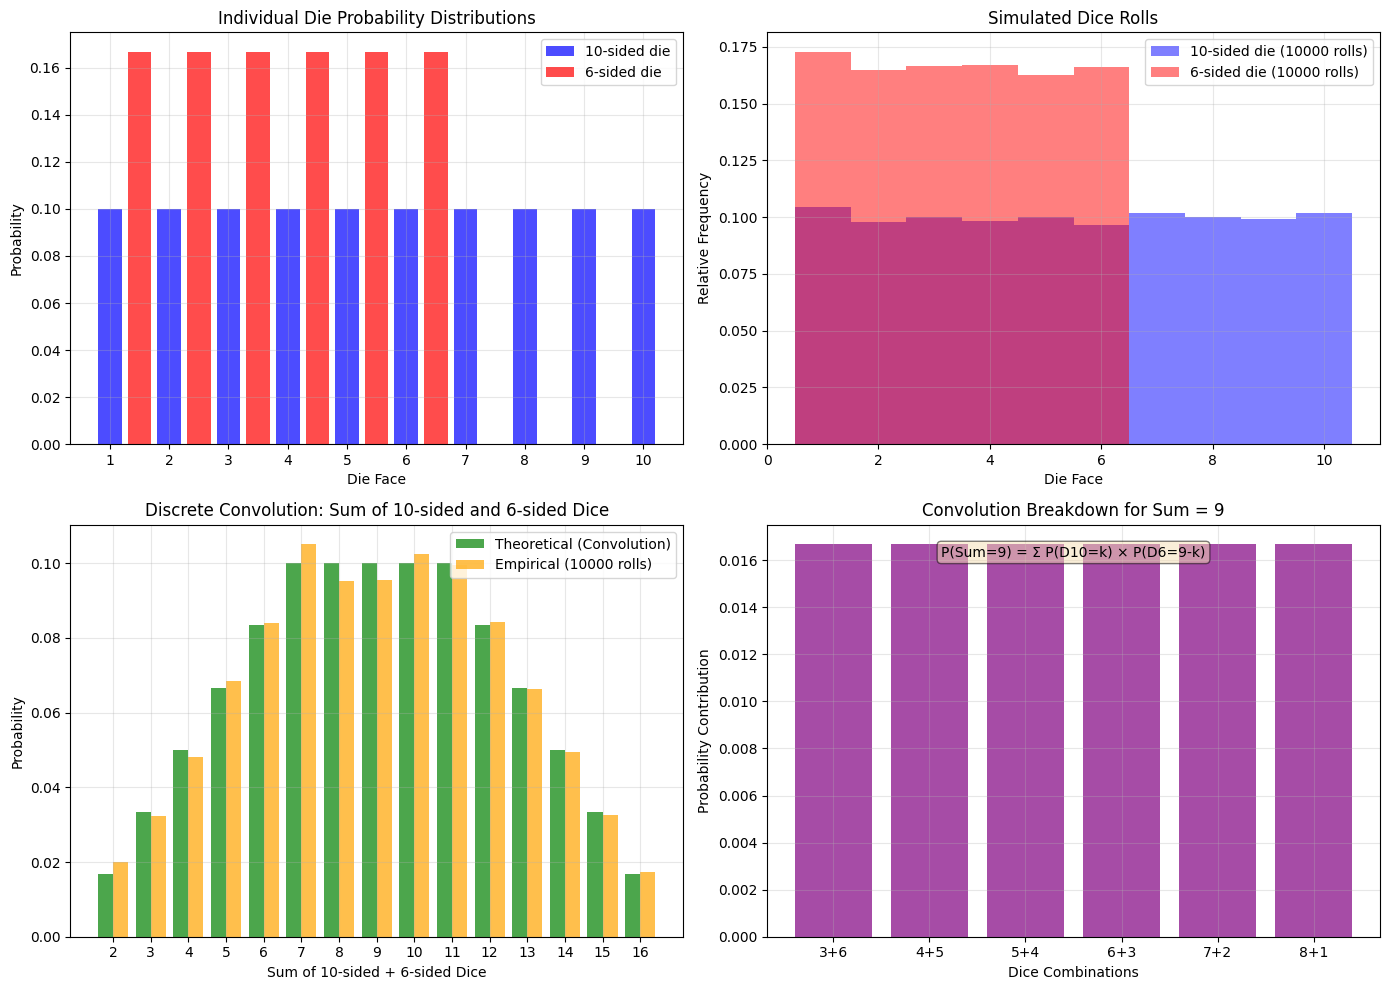

Discrete Convolution Formula:
(f * g)[n] = Σ f[k] × g[n-k]

For dice: P(Sum = n) = Σ P(D10 = k) × P(D6 = n-k)

Theoretical Probabilities (via Convolution):
P(Sum = 2) = 0.0167
P(Sum = 3) = 0.0333
P(Sum = 4) = 0.0500
P(Sum = 5) = 0.0667
P(Sum = 6) = 0.0833
P(Sum = 7) = 0.1000
P(Sum = 8) = 0.1000
P(Sum = 9) = 0.1000
P(Sum = 10) = 0.1000
P(Sum = 11) = 0.1000
P(Sum = 12) = 0.0833
P(Sum = 13) = 0.0667
P(Sum = 14) = 0.0500
P(Sum = 15) = 0.0333
P(Sum = 16) = 0.0167


In [7]:
import numpy as np

# Discrete Convolution with Dice Simulation
# Simulate rolling a 10-sided die and a 6-sided die and show the convolution

import matplotlib.pyplot as plt

# Create dice probability distributions
# 10-sided die: outcomes 1-10, each with probability 1/10
die10_faces = np.arange(1, 11)
die10_prob = np.ones(10) / 10

# 6-sided die: outcomes 1-6, each with probability 1/6
die6_faces = np.arange(1, 7)
die6_prob = np.ones(6) / 6

# Simulate dice rolls
n_rolls = 10000
die10_rolls = np.random.randint(1, 11, n_rolls)
die6_rolls = np.random.randint(1, 7, n_rolls)
sum_rolls = die10_rolls + die6_rolls

# Calculate empirical distribution of sum
sum_values, sum_counts = np.unique(sum_rolls, return_counts=True)
sum_prob_empirical = sum_counts / n_rolls

# Calculate theoretical distribution using discrete convolution
# Possible sums range from 2 (1+1) to 16 (10+6)
sum_range = np.arange(2, 17)
sum_prob_theoretical = np.zeros(15)

# Discrete convolution formula: (f * g)[n] = Σ f[k] * g[n-k]
for n in sum_range:
    for k in die10_faces:
        if (n - k) in die6_faces:  # Check if n-k is a valid die6 face
            sum_prob_theoretical[n-2] += die10_prob[k-1] * die6_prob[n-k-1]

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Individual die distributions
ax1 = axes[0, 0]
ax1.bar(die10_faces, die10_prob, color='blue', alpha=0.7, label='10-sided die', width=0.4)
# Offset 6-sided die for visibility
die6_x = np.arange(1, 7) + 0.5
ax1.bar(die6_x, die6_prob, color='red', alpha=0.7, label='6-sided die', width=0.4)
ax1.set_xlabel('Die Face')
ax1.set_ylabel('Probability')
ax1.set_title('Individual Die Probability Distributions')
ax1.set_xticks(np.arange(1, 11))
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Simulated rolls histogram
ax2 = axes[0, 1]
ax2.hist(die10_rolls, bins=np.arange(0.5, 11.5, 1), alpha=0.5, color='blue', 
         density=True, label=f'10-sided die ({n_rolls} rolls)')
ax2.hist(die6_rolls, bins=np.arange(0.5, 7.5, 1), alpha=0.5, color='red', 
         density=True, label=f'6-sided die ({n_rolls} rolls)')
ax2.set_xlabel('Die Face')
ax2.set_ylabel('Relative Frequency')
ax2.set_title('Simulated Dice Rolls')
ax2.set_xlim(0, 11)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Convolution result (sum distribution)
ax3 = axes[1, 0]
ax3.bar(sum_range - 0.2, sum_prob_theoretical, width=0.4, color='green', 
        alpha=0.7, label='Theoretical (Convolution)')
ax3.bar(sum_values + 0.2, sum_prob_empirical, width=0.4, color='orange', 
        alpha=0.7, label=f'Empirical ({n_rolls} rolls)')
ax3.set_xlabel('Sum of 10-sided + 6-sided Dice')
ax3.set_ylabel('Probability')
ax3.set_title('Discrete Convolution: Sum of 10-sided and 6-sided Dice')
ax3.set_xticks(sum_range)
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Step-by-step convolution visualization
ax4 = axes[1, 1]
# Show how convolution works for a specific sum (e.g., sum = 9)
target_sum = 9
contributions = []
contributing_pairs = []

for k in die10_faces:
    if (target_sum - k) in die6_faces:
        prob = die10_prob[k-1] * die6_prob[target_sum-k-1]
        contributions.append(prob)
        contributing_pairs.append(f"{k}+{target_sum-k}")

ax4.bar(range(len(contributions)), contributions, color='purple', alpha=0.7)
ax4.set_xticks(range(len(contributions)))
ax4.set_xticklabels(contributing_pairs)
ax4.set_xlabel('Dice Combinations')
ax4.set_ylabel('Probability Contribution')
ax4.set_title(f'Convolution Breakdown for Sum = {target_sum}')
ax4.grid(True, alpha=0.3)

# Add text showing the convolution formula
ax4.text(0.5, 0.95, f'P(Sum={target_sum}) = Σ P(D10=k) × P(D6={target_sum}-k)', 
         transform=ax4.transAxes, ha='center', va='top', fontsize=10,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# Print convolution formula and results
print("Discrete Convolution Formula:")
print("(f * g)[n] = Σ f[k] × g[n-k]")
print("\nFor dice: P(Sum = n) = Σ P(D10 = k) × P(D6 = n-k)")
print("\nTheoretical Probabilities (via Convolution):")
for i, prob in enumerate(sum_prob_theoretical):
    if prob > 0:  # Only print non-zero probabilities
        print(f"P(Sum = {i+2}) = {prob:.4f}")

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from scipy import signal, ndimage
import cv2

# Create a synthetic test image with various features
def create_test_image(size=256):
    """Create a test image with geometric shapes and patterns"""
    img = np.zeros((size, size))
    
    # Add a circle
    center = size // 4
    y, x = np.ogrid[:size, :size]
    mask_circle = (x - center)**2 + (y - center)**2 <= (size//8)**2
    img[mask_circle] = 255
    
    # Add a square
    square_size = size // 6
    start = 3 * size // 4 - square_size // 2
    end = 3 * size // 4 + square_size // 2
    img[start:end, start:end] = 200
    
    # Add diagonal lines
    for i in range(size):
        if i < size - 50:
            img[i, i + 50] = 180
        if i > 50:
            img[i, i - 50] = 160
    
    # Add some texture (random noise in a region)
    texture_region = img[size//2:3*size//4, size//8:3*size//8]
    noise = np.random.normal(0, 30, texture_region.shape)
    img[size//2:3*size//4, size//8:3*size//8] = np.clip(texture_region + noise, 0, 255)
    
    # Add horizontal and vertical lines
    img[size//3, :] = 220  # Horizontal line
    img[:, size//3] = 240  # Vertical line
    
    return img.astype(np.uint8)

# Define various convolution kernels
def get_convolution_kernels():
    """Return a dictionary of different convolution kernels"""
    kernels = {
        'Original': np.array([[0, 0, 0],
                             [0, 1, 0],
                             [0, 0, 0]]),
        
        'Blur (Box)': np.ones((5, 5)) / 25,
        
        'Blur (Gaussian)': np.array([[1, 2, 1],
                                    [2, 4, 2],
                                    [1, 2, 1]]) / 16,
        
        'Edge Detection (Sobel X)': np.array([[-1, 0, 1],
                                             [-2, 0, 2],
                                             [-1, 0, 1]]),
        
        'Edge Detection (Sobel Y)': np.array([[-1, -2, -1],
                                             [ 0,  0,  0],
                                             [ 1,  2,  1]]),
        
        'Edge Detection (Laplacian)': np.array([[0, -1, 0],
                                               [-1, 4, -1],
                                               [0, -1, 0]]),
        
        'Sharpen': np.array([[0, -1, 0],
                            [-1, 5, -1],
                            [0, -1, 0]]),
        
        'Emboss': np.array([[-2, -1, 0],
                           [-1,  1, 1],
                           [ 0,  1, 2]]),
        
        'Ridge Detection': np.array([[-1, -1, -1],
                                    [-1,  8, -1],
                                    [-1, -1, -1]])
    }
    return kernels

# Create test image
original_image = create_test_image(256)

# Get all kernels
kernels = get_convolution_kernels()

# Apply convolution with each kernel
convolved_images = {}
for name, kernel in kernels.items():
    if name == 'Original':
        convolved_images[name] = original_image
    else:
        # Apply convolution
        convolved = signal.convolve2d(original_image, kernel, mode='same', boundary='symm')
        
        # Normalize the result for display
        if name.startswith('Edge') or name in ['Emboss', 'Ridge Detection']:
            # For edge detection, we want to see both positive and negative values
            convolved = np.clip(convolved + 128, 0, 255)
        else:
            # For other filters, normalize to 0-255
            convolved = np.clip(convolved, 0, 255)
        
        convolved_images[name] = convolved.astype(np.uint8)

# Create comprehensive visualization
fig = plt.figure(figsize=(20, 16))
gs = fig.add_gridspec(4, 5, hspace=0.3, wspace=0.3)

# Plot all kernel results
kernel_names = list(kernels.keys())
for i, name in enumerate(kernel_names):
    row = i // 5
    col = i % 5
    
    if row < 2:  # First two rows for images
        ax = fig.add_subplot(gs[row, col])
        ax.imshow(convolved_images[name], cmap='gray', vmin=0, vmax=255)
        ax.set_title(f'{name}', fontsize=12, fontweight='bold')
        ax.axis('off')

# Plot kernels in the third row
for i, (name, kernel) in enumerate(list(kernels.items())[5:]):
    if i < 4:  # Only show 4 kernels
        ax = fig.add_subplot(gs[2, i])
        im = ax.imshow(kernel, cmap='RdBu', vmin=-2, vmax=2)
        ax.set_title(f'{name}\nKernel', fontsize=10, fontweight='bold')
        
        # Add kernel values as text
        for (j, k), val in np.ndenumerate(kernel):
            ax.text(k, j, f'{val:.1f}', ha='center', va='center', 
                   color='white' if abs(val) > 1 else 'black', fontweight='bold')
        ax.set_xticks([])
        ax.set_yticks([])

# Add explanation text
ax_text = fig.add_subplot(gs[3, :])
ax_text.axis('off')
explanation = """
2D Convolution in Image Processing:
• Blur kernels smooth the image by averaging neighboring pixels
• Edge detection kernels highlight rapid intensity changes (edges)
• Sharpen kernels enhance edges and details
• Each kernel slides across the image, computing weighted sums of pixel neighborhoods

Mathematical Formula: (I * K)(x,y) = ΣΣ I(x+i, y+j) × K(i,j)
Where I is the input image and K is the convolution kernel
"""
ax_text.text(0.05, 0.5, explanation, fontsize=14, verticalalignment='center',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8))

plt.suptitle('2D Image Convolution with Different Kernels', fontsize=18, fontweight='bold', y=0.95)
plt.show()

# Create animated convolution process
def create_convolution_animation():
    """Create an animation showing the convolution process step by step"""
    
    # Use a smaller image for animation
    small_img = original_image[100:156, 100:156]  # 56x56 region
    kernel = kernels['Edge Detection (Sobel X)']
    
    # Pad the image for convolution
    pad_size = kernel.shape[0] // 2
    padded_img = np.pad(small_img, pad_size, mode='constant', constant_values=0)
    
    # Calculate all convolution steps
    steps = []
    result_img = np.zeros_like(small_img, dtype=float)
    
    step_size = 4  # Skip steps for faster animation
    positions = [(i, j) for i in range(0, small_img.shape[0], step_size) 
                 for j in range(0, small_img.shape[1], step_size)]
    
    for pos_idx, (i, j) in enumerate(positions):
        # Extract the region
        region = padded_img[i:i+kernel.shape[0], j:j+kernel.shape[1]]
        
        # Compute convolution at this position
        conv_value = np.sum(region * kernel)
        result_img[i, j] = conv_value
        
        # Store step information
        steps.append({
            'position': (i, j),
            'region': region.copy(),
            'conv_value': conv_value,
            'result_so_far': result_img.copy(),
            'progress': (pos_idx + 1) / len(positions)
        })
    
    # Create animation figure
    fig_anim, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig_anim.suptitle('2D Convolution Process Animation', fontsize=16, fontweight='bold')
    
    def animate_step(frame):
        # Clear all axes
        for ax_row in axes:
            for ax in ax_row:
                ax.clear()
        
        if frame < len(steps):
            step = steps[frame]
            
            # Plot 1: Original image with current position highlighted
            axes[0, 0].imshow(small_img, cmap='gray')
            i, j = step['position']
            rect = plt.Rectangle((j-1.5, i-1.5), 3, 3, linewidth=3, 
                               edgecolor='red', facecolor='none')
            axes[0, 0].add_patch(rect)
            axes[0, 0].set_title('Original Image\n(Red box shows current position)')
            axes[0, 0].axis('off')
            
            # Plot 2: Current region being processed
            axes[0, 1].imshow(step['region'], cmap='gray', vmin=0, vmax=255)
            axes[0, 1].set_title('Current 3×3 Region')
            for (r, c), val in np.ndenumerate(step['region']):
                axes[0, 1].text(c, r, f'{int(val)}', ha='center', va='center',
                               color='red', fontweight='bold', fontsize=8)
            
            # Plot 3: Kernel
            im_kernel = axes[0, 2].imshow(kernel, cmap='RdBu', vmin=-2, vmax=2)
            axes[0, 2].set_title('Sobel X Kernel')
            for (r, c), val in np.ndenumerate(kernel):
                axes[0, 2].text(c, r, f'{val}', ha='center', va='center',
                               color='white' if abs(val) > 1 else 'black', 
                               fontweight='bold')
            
            # Plot 4: Element-wise multiplication
            product = step['region'] * kernel
            axes[1, 0].imshow(product, cmap='RdBu')
            axes[1, 0].set_title('Element-wise Product')
            for (r, c), val in np.ndenumerate(product):
                axes[1, 0].text(c, r, f'{int(val)}', ha='center', va='center',
                               color='white' if abs(val) > 50 else 'black', 
                               fontweight='bold', fontsize=8)
            
            # Plot 5: Convolution result so far
            result_display = step['result_so_far'] + 128  # Shift for display
            result_display = np.clip(result_display, 0, 255)
            axes[1, 1].imshow(result_display, cmap='gray', vmin=0, vmax=255)
            axes[1, 1].set_title(f'Result So Far\n({step["progress"]:.1%} complete)')
            axes[1, 1].axis('off')
            
            # Plot 6: Information panel
            axes[1, 2].axis('off')
            info_text = f"""
Convolution Calculation:

Sum = Σ(region × kernel)
    = {step['conv_value']:.1f}

Position: ({i}, {j})
Progress: {step['progress']:.1%}

The convolution slides the kernel
across the entire image, computing
the weighted sum at each position.
            """
            axes[1, 2].text(0.1, 0.5, info_text, fontsize=11, verticalalignment='center',
                           bbox=dict(boxstyle='round,pad=0.5', facecolor='lightyellow'))
        
        # Set consistent axis properties
        for ax_row in axes:
            for ax in ax_row:
                if ax.get_images():
                    ax.set_xticks([])
                    ax.set_yticks([])
    
    # Create animation
    anim = FuncAnimation(fig_anim, animate_step, frames=len(steps), 
                        interval=200, repeat=True, blit=False)
    
    plt.tight_layout()
    return anim

# Create and display the animation
convolution_anim = create_convolution_animation()
HTML(convolution_anim.to_jshtml())

ModuleNotFoundError: No module named 'cv2'